# 1. Identification of Problems

**Background**

In the competitive telecommunications industry, customer retention is the key to success. Customer retention requires a deep understanding of customer behavior. Therefore, it is necessary to analyze customer data so that companies can take proactive steps to prevent customers from unsubscribing.

**SMART**

+ Specific: Identify and analyze the main factors that contribute to churn rate in telecommunications companies.
+ Measurable: Measure the impact of these factors on customer churn rates through data analysis and statistical techniques.
+ Achievable: Accessing and analyzing customer data is possible making it possible to identify key factors influencing churn.
+ Relevant: Analyzing these factors is very relevant to the company's goals because reducing the churn rate is very important for the sustainability and growth of the business.
+ Time: Complete analysis and factor identification within a specified time period to enable development of effective customer retention strategies in a timely manner.

**Problem Statement**

Analyze the factors that influence the churn rate in a telecommunications company to develop an effective retention strategy.

**5W + 1H**
+ What percentage of customers unsubscribe overall?
+ What percentage of customers churn by gender?
+ Customers with what types of contracts unsubscribe?
+ Customers with what payment types unsubscribe?
+ Is there a significant difference between the monthly charges of customers who churn and those who don't churn?
+ How long is the tenure of customers who unsubscribe?

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Library

# 2. Data Loading

In this project, a dataset is used that contains customer data at a telecommunications company. The data source can be accessed here https://www.kaggle.com/datasets/blastchar/telco-customer-churn.

In [4]:
df = pd.read_csv('data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataset has 7043 rows and 21 columns.

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Displays the first 5 rows of the dataset.

In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Displays the last 5 rows of the dataset.

# 3. Data Cleaning

Before the analysis process is undertaken, a data cleaning process is performed initially to ensure that the obtained analysis results are more accurate.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the data above, it can be seen that all columns do not have any missing values. However, there is one column that has an inappropriate data type, which is TotalCharges. This column should have a float data type.

In [8]:
df.drop(columns=['customerID'], inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Remove the customerID column as it is not needed for the subsequent analysis steps.

In [9]:
df.rename(columns={'gender': 'Gender'}, inplace=True)
df.rename(columns={'SeniorCitizen': 'Senior Citizen'}, inplace=True)
df.rename(columns={'tenure': 'Tenure'}, inplace=True)
df.rename(columns={'PhoneService': 'Phone Service'}, inplace=True)
df.rename(columns={'MultipleLines': 'Multiple Lines'}, inplace=True)
df.rename(columns={'InternetService': 'Internet Service'}, inplace=True)
df.rename(columns={'OnlineSecurity': 'Online Security'}, inplace=True)
df.rename(columns={'OnlineBackup': 'Online Backup'}, inplace=True)
df.rename(columns={'DeviceProtection': 'Device Protection'}, inplace=True)
df.rename(columns={'TechSupport': 'Tech Support'}, inplace=True)
df.rename(columns={'StreamingTV': 'Streaming TV'}, inplace=True)
df.rename(columns={'StreamingMovies': 'Streaming Movies'}, inplace=True)
df.rename(columns={'PaperlessBilling': 'Paperless Billing'}, inplace=True)
df.rename(columns={'PaymentMethod': 'Payment Method'}, inplace=True)
df.rename(columns={'MonthlyCharges': 'Monthly Charges'}, inplace=True)
df.rename(columns={'TotalCharges': 'Total Charges'}, inplace=True)

df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Change the column names to make them look neater.

In [10]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

Change the data type of the TotalCharges column to float.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

After changing the data type of the Total Charges column to float, missing values were found.

In [12]:
df['Total Charges'].fillna(0, inplace=True)

Change the missing values in the Total Charges column to 0.

In [13]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

Perform a check in each column for the presence of missing values, and from the results above, it can be seen that the dataset no longer has any missing values.

In [14]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Displaying the first 5 rows of the cleaned dataset, which is ready for further analysis.

# 4. Analysis and Calculation

## 4.1 The percentage of customers who churn and do not churn overall.

In [23]:
# Calculating the percentage of customers who churn and do not churn
churned_count = len(df[df['Churn'] == 'Yes'])
not_churned_count = len(df[df['Churn'] == 'No'])

total_customers = len(df)

churned_percentage = (churned_count / total_customers) * 100
not_churned_percentage = (not_churned_count / total_customers) * 100

print(f"Churned Percentage: {churned_percentage:.2f}%")
print(f"Not Churned Percentage: {not_churned_percentage:.2f}%")


Churned Percentage: 26.54%
Not Churned Percentage: 73.46%


Out of the total number of customers, approximately 26.54% have churned, and 73.46% have not churned.

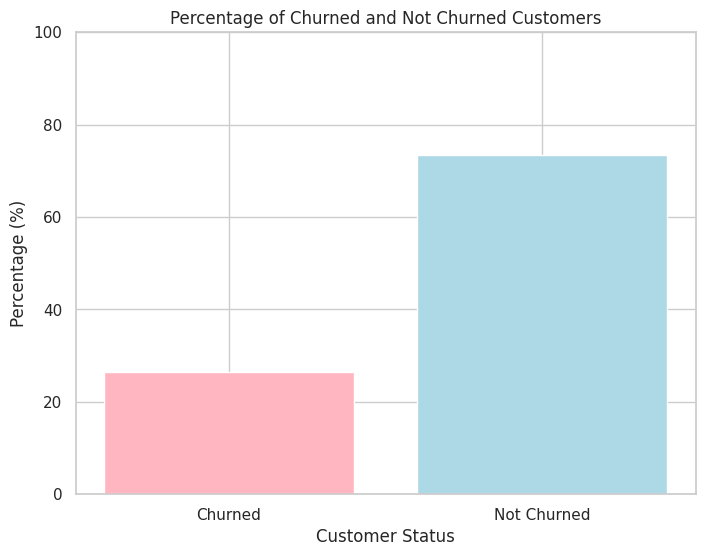

In [29]:
sns.set_theme(style='whitegrid', palette='pastel')

plt.figure(figsize=(8, 6))
plt.bar(['Churned', 'Not Churned'], [churned_percentage, not_churned_percentage], color=['#FFB6C1', '#ADD8E6'])
plt.xlabel('Customer Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Churned and Not Churned Customers')
plt.ylim(0, 100)
plt.show()

It can be seen that the percentage of customers who have churned in this company is quite significant.

## 4.2 Percentage of Customers who Churn and do not Churn based on Gender

In [16]:
df['Churned'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

Creating a new column named "Churned" based on the "Churn" column, where if the data in the "Churn" column is Yes, it will be converted to 1, and conversely, it will be converted to 0 if it is No in the "Churn" column.

In [17]:
gender_churn = df.groupby('Gender')['Churned'].mean() * 100
gender_churn

Gender
Female    26.920872
Male      26.160338
Name: Churned, dtype: float64

From the results above, it can be observed that approximately 26.92% of female customers have churned, and around 26.16% of male customers have also churned.

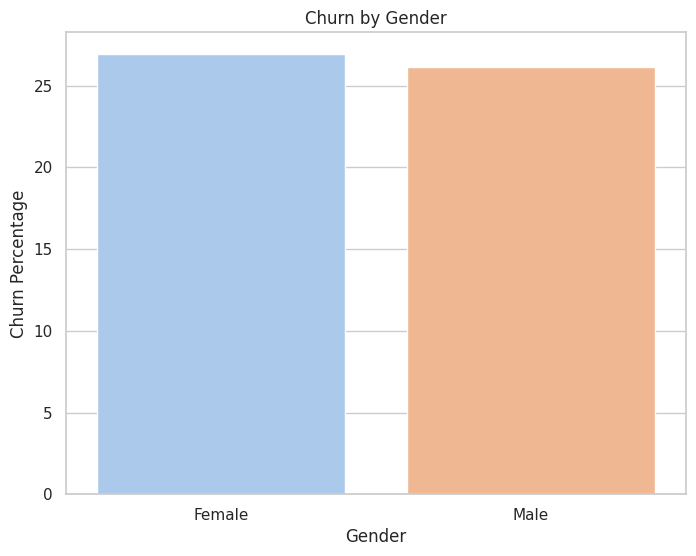

In [18]:
gender_churn = df.groupby('Gender')['Churned'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_churn.index, y=gender_churn.values)
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.title('Churn by Gender')
plt.show()

The bar plot above indicates that the churn percentages between male and female customers do not show significant differences.

## 4.3 Percentage of Customers who Churn and do not Churn based on Contract Type

In [19]:
# Calculating the average percentage of churn based on contract type
contract_churn = df.groupby('Contract')['Churned'].mean() * 100
contract_churn

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churned, dtype: float64

From the results above, it can be observed that approximately 42.71% of customers with a Month-to-Month contract have churned, 11.27% of customers with a One-Year contract have churned, and 2.83% of customers with a Two-Year contract have churned.

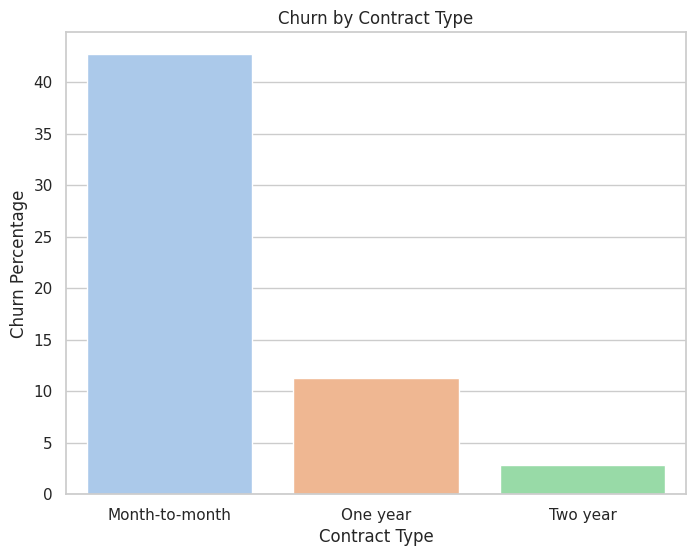

In [20]:
contract_churn = df.groupby('Contract')['Churned'].mean() * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.xlabel('Contract Type')
plt.ylabel('Churn Percentage')
plt.title('Churn by Contract Type')
plt.show()

From the bar plot above, it can be seen that customers with a Month-to-Month contract have the highest churn percentage.

## 4.4 Percentage of Customers who Churn and do not Churn based on Tenure.

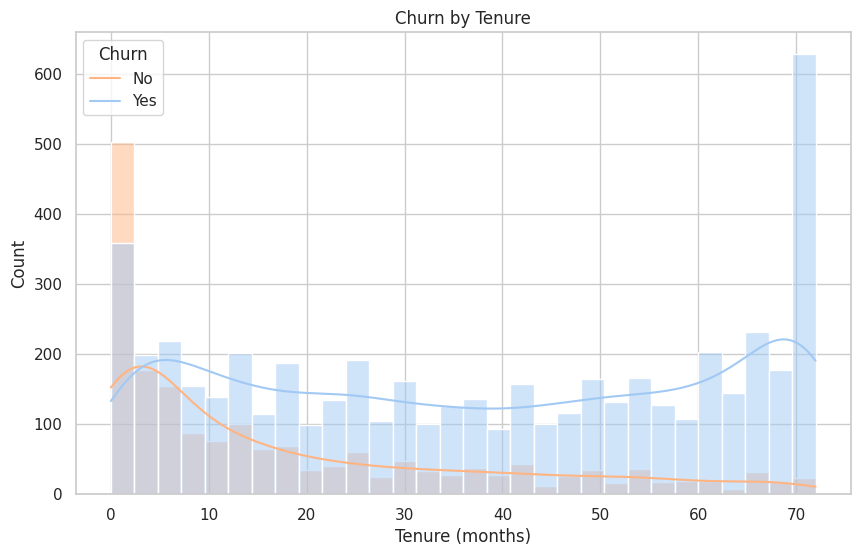

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Churn', bins=30, kde=True)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

From the figure above, it can be observed that customers with shorter tenure or those who have recently subscribed tend to have a lower likelihood of churning, while customers with longer tenure are more likely to churn.

## 4.5 Percentage of Customers who Churn and do not Churn based on Payment Method.

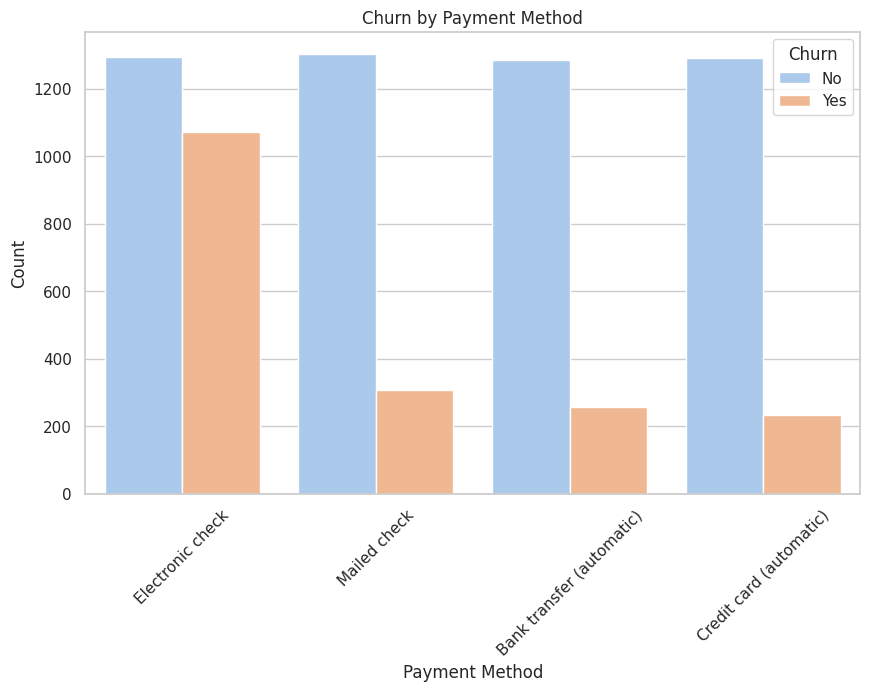

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment Method', hue='Churn')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()

From the plot above, it can be observed that the number of customers with the payment method "Electronic check" who churned is quite significant.

## 4.6 Distribution of Monthly Charges

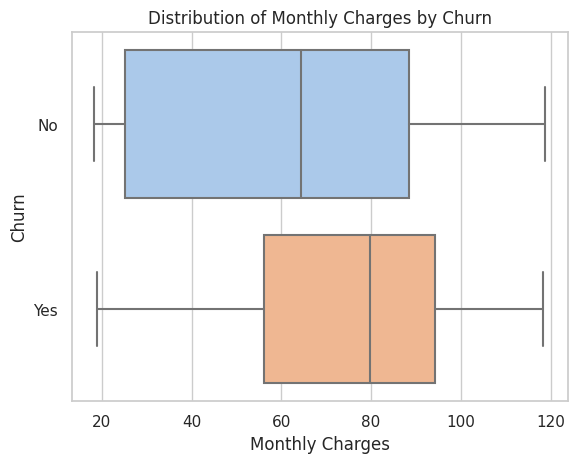

In [38]:
sns.boxplot(data=df, x='Monthly Charges', y='Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.title('Distribution of Monthly Charges by Churn')
plt.show()

From the results above, it can be seen that customers who do not churn tend to have lower monthly charges. Meanwhile, customers who churn tend to have higher monthly charges compared to those who do not churn.

## 4.7 Descriptive Statistics

In this stage, a descriptive statistical test is conducted using central tendency. This method is chosen because understanding the mean, median, and mode of the Monthly Charges variable can provide significant insights into customer behavior. Knowing the monthly rates for customers who churn compared to those who do not can provide insight into whether customers who churn tend to pay higher or lower monthly fees.

In [55]:
# Calculating the mean monthly charges for churned customers
mean_monthly_charges_churned = df[df['Churn'] == 'Yes']['Monthly Charges'].mean()

# Calculating the mean monthly charges for non-churned customers
mean_monthly_charges_not_churned = df[df['Churn'] == 'No']['Monthly Charges'].mean()

print("Mean Monthly Charges for Churned Customers:", mean_monthly_charges_churned)
print("Mean Monthly Charges for Non-Churned Customers:", mean_monthly_charges_not_churned)
print('\n')

# Calculating the median monthly charges for churned customers
median_monthly_charges_churned = df[df['Churn'] == 'Yes']['Monthly Charges'].median()

# Calculating the median monthly charges for non-churned customers
median_monthly_charges_not_churned = df[df['Churn'] == 'No']['Monthly Charges'].median()

# Print the results
print("Median Monthly Charges for Churned Customers:", median_monthly_charges_churned)
print("Median Monthly Charges for Non-Churned Customers:", median_monthly_charges_not_churned)
print('\n')

# Calculating the mode of monthly charges for churned customers
mode_monthly_charges_churned = df[df['Churn'] == 'Yes']['Monthly Charges'].mode().values[0]

# Calculating the mode of monthly charges for non-churned customers
mode_monthly_charges_not_churned = df[df['Churn'] == 'No']['Monthly Charges'].mode().values[0]

# Print the results
print("Mode Monthly Charges for Churned Customers:", mode_monthly_charges_churned)
print("Mode Monthly Charges for Non-Churned Customers:", mode_monthly_charges_not_churned)

Mean Monthly Charges for Churned Customers: 74.44133226324237
Mean Monthly Charges for Non-Churned Customers: 61.26512369540008


Median Monthly Charges for Churned Customers: 79.65
Median Monthly Charges for Non-Churned Customers: 64.42500000000001


Mode Monthly Charges for Churned Customers: 74.4
Mode Monthly Charges for Non-Churned Customers: 20.05


+ The average monthly charges for churned customers are higher, around 74.44, compared to non-churned customers who have an average monthly charge of about 61.27.

+ The median monthly charge for churned customers is 79.65, while the median monthly charge for non-churned customers is 64.43.

+ The mode of monthly charges for churned customers is 74.4, whereas for non-churned customers, it is 20.05.

From these results, it can be observed that there is a significant difference in monthly charges between churned and non-churned customers. Churned customers tend to have higher average monthly charges, although the median and mode show variations in the data. This information can serve as a basis for decision-making related to customer retention strategies within the company.

## 4.8 Inferential Statistics

The selected statistical test at this stage is ANOVA because this test is used to determine whether there is a statistically significant difference among two or more groups. In this case, we want to ascertain whether there is a significant difference in Monthly Charges and Total Charges between two groups: customers who churn and customers who do not churn.

In [48]:
from scipy.stats import f_oneway

# H0: There is no significant difference in monthly charges between customers who churn and customers who do not churn.
# H1: There is a significant difference in monthly charges between customers who churn and customers who do not churn.

churned_monthly_charges = df[df['Churn'] == 'Yes']['Monthly Charges']
not_churned_monthly_charges = df[df['Churn'] == 'No']['Monthly Charges']

# ANOVA test
f_statistic, p_value = f_oneway(churned_monthly_charges, not_churned_monthly_charges)


print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 273.4637042077133
P-value: 2.7066456068950115e-60


+ The relatively high F-statistic value of 273.46 indicates that there is significant variation in monthly charges between the group of customers who churn and the group of customers who do not churn.

+ The very small p-value, around 2.71e-60, suggests that the difference in monthly charges between these two groups is highly statistically significant. With a p-value smaller than alpha (0.05), H0 is rejected, meaning there is a significant difference in monthly charges between customers who churn and customers who do not churn.

In [49]:
from scipy.stats import f_oneway

# H0: There is no significant difference in total charges between customers who churn and customers who do not churn.
# H1: There is a significant difference in total charges between customers who churn and customers who do not churn.

churned_total_charges = df[df['Churn'] == 'Yes']['Total Charges']
not_churned_total_charges = df[df['Churn'] == 'No']['Total Charges']

# Perform ANOVA test
f_statistic, p_value = f_oneway(churned_total_charges, not_churned_total_charges)

# Display the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 288.2789610222117
P-value: 2.127211613245422e-63


+ F-statistic: The high F-statistic value of 288.28 indicates that there is significant variation in total charges between the group of customers who churn and the group of customers who do not churn.

+ P-value: The very small p-value, around 2.13e-63, suggests that the difference in total charges between these two groups is highly statistically significant. With a p-value smaller than alpha (0.05), H0 is rejected, meaning there is a significant difference in total charges between customers who churn and customers who do not churn.

# 5.Conclusion

Based on the descriptive, inferential, and visualization analyses of customer data, the following conclusions can be drawn:

+ The churn rate in this telecommunications company is relatively high at 26.54%. This has implications for the company's revenue and may indicate issues such as customer dissatisfaction, uncompetitive pricing, or inadequate service quality.

+ Approximately 26.92% of female customers churn, while about 26.16% of male customers churn. This suggests that there is not a significant difference in the churn rate between these two gender groups.

+ Customers with a "Month-to-month" contract have a much higher churn rate (42.71%) compared to customers with "One year" (11.27%) and "Two years" (2.83%) contracts. This indicates that customers with monthly contracts are significantly more likely to churn. This information can assist the company in designing more effective retention strategies, such as offering incentives for monthly contract customers to stay subscribed longer or developing special offers for customers with longer-term contracts.

+ The number of customers using the "Electronic check" payment method who churn is relatively large compared to other payment methods. This information can be a starting point for the company to evaluate its payment methods and find ways to improve customer retention, such as introducing more attractive alternative payment methods or addressing potential issues associated with the "Electronic check" method.

+ There is a significant difference in total charges between customers who churn and customers who do not. To reduce the churn rate, the company can integrate additional services that are more attractive to customers, such as bundled offers that provide added value at competitive prices.

+ Customers with shorter tenure tend to have a lower churn rate. This may be because new customers are still in the trial phase or do not yet have strong reasons to cancel their subscriptions. Conversely, customers with longer tenure tend to have a higher churn rate, which could be due to various factors, including customer satisfaction, changing needs, or competitive offers.
